# It gets loopy

In this notebook, we will work with stock prices. I'll get you started by writing some code that go and fetch the last quotes of a few American stocks. We will then write loops and functions to do two things:

1. Evaluate the performance of an investing strategy on past data
2. Infer the possible performance of the same strategy on short-run future data

## Setup

We start by importing the quotes. It is not crucial to understand the code here below as we will see what a call to an API is during a future session. It works broadly like this: we call a server that sends us back a kind of nested dictionaries and lists that contain the quotes and date of those quotes for the 5 largest tech firms (that are sometimes referred to as GAFAM).

In [2]:
from requests import get 
stock_quotes = {}
# defines an empty dictionary/set

tickers = {"GOOG" : "Google", "AAPL" : "Apple", "FB": "Facebook", "AMZN" : "Amazon", "MSFT": "Microsoft"}
# defines a dictionary including Tickers and Stock Names

for ticker in tickers: # for each key in the dictionary
    
    prices_and_dates = {} # create an empty set named prices_and_dates for each key of the dictionary
    
    query = "https://financialmodelingprep.com/api/v3/historical-price-full/"+ticker+"?serietype=line"
    # defines the url from which we'll get the data
    
    histoire_des_prix = get(query).json()["historical"]
    # this query downloads a dataset including quotes and dates
    # json is the format of the data
    
    prices_and_dates["quotes"] = [cours["close"] for cours in histoire_des_prix[-31:]]
    prices_and_dates["dates"] = [cours["date"] for cours in histoire_des_prix[-31:]]
    # these two commands store the quotes (end of the day) and dates of the last 30 days for the aforementioned stocks
    
    stock_quotes[ticker] = prices_and_dates
    # stores the downloaded data into the previously defined set

Run the cell above: it will run for some time and then ends without showing anything. In fact, it loads a peculiar data structure in the memory of your computer. The structure consists in prices and dates contained inside a dictionary which is itself contained in a dictionary. It is kind of a lousy structure so far but we will see in next sessions (the pandas one) how to make it easier. For now, we have to rely on this awkward structure. Here are some example of how to use it.

In [3]:
# Show all prices for Google
y=stock_quotes["GOOG"]["quotes"]
print(y)
x = list(range(1,len(y)+1))
print(x)

[1451.7, 1480.39, 1484.4, 1485.95, 1486.65, 1466.71, 1433.9, 1452.56, 1458.63, 1455.84, 1434.23, 1485.94, 1447.07, 1448.23, 1476.23, 1479.23, 1508.68, 1508.79, 1518.27, 1514.66, 1520.74, 1519.67, 1526.69, 1518.15, 1485.11, 1421.59, 1388.45, 1393.18, 1318.09, 1339.33, 1389.11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [4]:
import matplotlib.pyplot as plt # you need to install the visualization package pyplot to do this

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# Show the price of the Apple closing quote yesterday
print(stock_quotes["AAPL"]["quotes"][-1])

298.81


In [6]:
# What is the date of the third quote for the Microsoft data?
print(stock_quotes["MSFT"]["dates"][2])

2020-01-21


## Let's work

OK, enough playing around! Now is your turn: Let's start by stretching our programming muscles. I'll write a line that will create a new variable called *quotes_amazon* and that is a list that contains the quotes of Amazon (in dollars) for all the data we have.

Your job is to create a new list, called *quotes_amazon_euro* in which you will store the quotes but in Euros (for this exercise, it is enough to consider that converting to Euros just means multiplying by *0.9* - please applied trade economists, don't crucify me for this approximation).

In [7]:
quotes_amazon = stock_quotes["AMZN"]["quotes"]
print(quotes_amazon)

# we can use what we learnt in the previous session, with for loops:
quotes_amazon_euro1=[]
for i in quotes_amazon:
    quotes_amazon_euro1.append(round(i*0.9,2))
    
print(quotes_amazon_euro1)

# or we can use the for inside the list:
quotes_amazon_euro2=[round(quote*0.9,2) for quote in quotes_amazon]
print(quotes_amazon_euro2)


[1877.94, 1864.72, 1892.0, 1887.46, 1884.58, 1861.64, 1828.34, 1853.25, 1858.0, 1870.68, 2008.72, 2004.2, 2049.67, 2039.87, 2050.23, 2079.28, 2133.91, 2150.8, 2160.0, 2149.87, 2134.87, 2155.67, 2170.22, 2153.1, 2095.97, 2009.29, 1972.74, 1979.59, 1884.3, 1883.75, 1953.95]
[1690.15, 1678.25, 1702.8, 1698.71, 1696.12, 1675.48, 1645.51, 1667.92, 1672.2, 1683.61, 1807.85, 1803.78, 1844.7, 1835.88, 1845.21, 1871.35, 1920.52, 1935.72, 1944.0, 1934.88, 1921.38, 1940.1, 1953.2, 1937.79, 1886.37, 1808.36, 1775.47, 1781.63, 1695.87, 1695.38, 1758.56]
[1690.15, 1678.25, 1702.8, 1698.71, 1696.12, 1675.48, 1645.51, 1667.92, 1672.2, 1683.61, 1807.85, 1803.78, 1844.7, 1835.88, 1845.21, 1871.35, 1920.52, 1935.72, 1944.0, 1934.88, 1921.38, 1940.1, 1953.2, 1937.79, 1886.37, 1808.36, 1775.47, 1781.63, 1695.87, 1695.38, 1758.56]


Done? Good! Now for a harder problem: We will create a function that will compute the mean of any list that is passed (provided it contains integers or floats, of course). The function will work broadly like this: You initialize a counter at 0, you loop over the list and, at each iteration, you add the value at that position to the counter. Once the loop is over, you divide this by the length of the list to obtain the average.

Oddly enough, Python doesn't ship with a built-in mean function (it was not initially a scientific computing language). Implementing it is therefore needed to perform the next steps (in future session, we will see some libraries, the most important being Numpy, that provide implementation of means functions.

Implement your function, call it my_mean and then see if it works on the list containing the prices of the Facebook stock (that will be stored in the variable *facebook_quotes*.

*Don't forget that you must produce a **function**, it will be important because we will use it in the next part!*

In [8]:
import numpy as np
facebook_quotes = stock_quotes["FB"]["quotes"]
print("Your function should produce the following result (plus ou minus numerical error):\t"
      , np.mean(facebook_quotes))

# Your code comes here below

# go as in the instructions
def my_mean(l):
    s=0
    for i in l:
        s=s+i
    return(s/len(l))

fb_mean1=my_mean(stock_quotes["FB"]["quotes"])
print(f'This is my Facebook mean computed via the loop:', fb_mean1)
        
# now do it faster
my_mean_l = lambda l : sum(l)/len(l)
fb_mean2=my_mean_l(stock_quotes["FB"]["quotes"])
print(f'This is my Facebook mean computed via the inline fct:',fb_mean2)

# verify
charlesmean=np.mean(facebook_quotes)
if round(fb_mean1,2) == round(charlesmean,2):
    print('Bravo!')
else:
    print('Nope! Check again!')


Your function should produce the following result (plus ou minus numerical error):	 210.6690322580645
This is my Facebook mean computed via the loop: 210.66903225806453
This is my Facebook mean computed via the inline fct: 210.66903225806453
Bravo!


Let's now build on top of what we did previously to build a function that computes the mobile average. Let's start by using a fix number of lags to be considered (you can always extend it later): We want to have a function that takes a list and produces a new list containing the average value of the three past value (you can either align the two list by setting the three first value of your result to *None* or not, this will impact the way you will have to solve the next exercises, but both ways will be equally practical). Test it on the Google quotes that are in the variable *google_quotes*.

[1472.16, 1483.58, 1485.67, 1479.77, 1462.42, 1451.06, 1448.36, 1455.68, 1449.57, 1458.67, 1455.75, 1460.41, 1457.18, 1467.9, 1488.05, 1498.9, 1511.91, 1513.91, 1517.89, 1518.36, 1522.37, 1521.5, 1509.98, 1474.95, 1431.72, 1401.07, 1366.57, 1350.2]
28
31


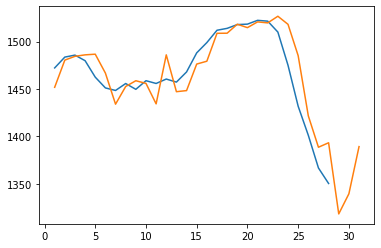

In [9]:
google_quotes = stock_quotes["GOOG"]["quotes"]

def mov_avg(inp):
    av=[]
    for x in inp[3:len(inp)+1]:
        pos=inp.index(x)
        new_list=[inp[pos-3],inp[pos-2],inp[pos-1]]
        av_new_list=round(my_mean(new_list),2)
        av.append(av_new_list)
    return av

a=mov_avg(google_quotes)
print(a)

print(len(a))
print(len(google_quotes))

x1 = list(range(1,len(a)+1))
plt.plot(x1, a)
x2 = list(range(1,len(google_quotes)+1))
plt.plot(x2, google_quotes)
plt.show()


Now that we have done it for a fix number of lags, do it again but now allow for a second parameter to your function: the number of lags you want to consider for your moving average.

[1472.16, 1483.58, 1485.67, 1479.77, 1462.42, 1451.06, 1448.36, 1455.68, 1449.57, 1458.67, 1455.75, 1460.41, 1457.18, 1467.9, 1488.05, 1498.9, 1511.91, 1513.91, 1517.89, 1518.36, 1522.37, 1521.5, 1509.98, 1474.95, 1431.72, 1401.07, 1366.57, 1350.2]
28


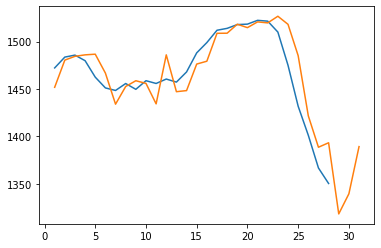

In [10]:
def moving(inp,p):
    av=[]
    for x in inp[p:len(inp)]:
        pos=inp.index(x)
        new_list=[inp[pos-3],inp[pos-2],inp[pos-1]]
        av_new_list=round(my_mean(new_list),2)
        av.append(av_new_list)
    return av

b=moving(google_quotes,3)
print(b)
print(len(b))

x1 = list(range(1,len(b)+1))
plt.plot(x1, b)
x2 = list(range(1,len(google_quotes)+1))
plt.plot(x2, google_quotes)
plt.show()

We are now going to compute the mean squared error. Write a function that sums over the squared differences between the actual value and your moving-average-based forecast. This will help us determining the optimal number of lags for our secret investment strategy at the next step.

In [11]:
def mse(l1,l2):
    err=[]
    for i in range(0,len(l1)):
        err.append((l1[i]-l2[i])**2)
    return my_mean(err)

cut_quotes=google_quotes[3:len(google_quotes)]
meansqerr=mse(cut_quotes,b)
print(meansqerr)
print(google_quotes)
print(cut_quotes)
print(len(cut_quotes))
print(len(b))

1265.8317500000005
[1451.7, 1480.39, 1484.4, 1485.95, 1486.65, 1466.71, 1433.9, 1452.56, 1458.63, 1455.84, 1434.23, 1485.94, 1447.07, 1448.23, 1476.23, 1479.23, 1508.68, 1508.79, 1518.27, 1514.66, 1520.74, 1519.67, 1526.69, 1518.15, 1485.11, 1421.59, 1388.45, 1393.18, 1318.09, 1339.33, 1389.11]
[1485.95, 1486.65, 1466.71, 1433.9, 1452.56, 1458.63, 1455.84, 1434.23, 1485.94, 1447.07, 1448.23, 1476.23, 1479.23, 1508.68, 1508.79, 1518.27, 1514.66, 1520.74, 1519.67, 1526.69, 1518.15, 1485.11, 1421.59, 1388.45, 1393.18, 1318.09, 1339.33, 1389.11]
28
28


Our masterplan to get rich is getting together nicely...

#[coming_together](https://i1.wp.com/media1.tenor.com/images/a71c94c3aa7ad66a5051f81f48d14dd2/tenor.gif?w=688&ssl=1)

The last step before creating the actual investement strategy: we are going to evaluate which lag produces the smallest mean square error. For that, create a function that loops over the range between 2 and 6 and return the optimal lag (the one with the smallest MSE).

In [82]:
def opt_lag(l1):
    val=[]
    lag=2
    for q in range(2,7):
        movav=moving(l1,q)
        cut_quotes1=l1[q:len(l1)+1]
        m=mse(cut_quotes1,movav)
        if q>2:
            if m<min(val):
                lag=q
        val.append(m)
        #print(f'For {q} lags, the MSE is {round(mse(cut_quotes,movav),2)}')
    #print('')
    #print(f'The minimum MSE is {round(min(val),2)}')
    #print(f'The optimal number of lags is {lag}')
    print(val)
    return(lag)
    
opt_lag(google_quotes)

[1366.1409310344848, 1238.3782464285725, 1256.640774074075, 1297.6591076923085, 1349.188476000001]


3

We are now going to devise an incredibly dumb investment strategy: if your moving-average prediction (with the optimal lag - see, we are already [double-dipping](https://en.wikipedia.org/wiki/Circular_analysis) in the data...) is higher than the current price on a day, we invest all our accrued fortune (if we currently had no stock) or hold (if we had already some value invested), if the prediction is below, we sell our whole position (or do nothing if we had no money invested at the time).

How much would we have today if we had started using this strategy on February 3rd and started out with 100 Euros?

This is a significantly more complex problem than the ones above and you might want to split it into subproblems (for example, a good idea could be to devise a function that takes two values and returns the variation between those). There are many ways to solve it, find the one that makes more sense to you. The result should be the same for everyone, though.

## Get rich (fast) or code tryin'

The last step for today is to assess how much we will make in the near future. For this, we will use a small, non-parametric Monte-Carlo simulation.

![monte_carlo](http://www.azquotes.com/picture-quotes/quote-in-mathematics-as-in-physics-so-much-depends-on-chance-on-a-propitious-moment-stanislaw-ulam-111-21-35.jpg)

Here's how it will go: we are going to reuse the function that simulates the performance of our stupid investment strategy but on simulated data that will be produced in the following way: we are going to simulate 20 periods of data by resampling at random the past prices. This can be done using the function [random.choices(population, weights=None, \*, cum_weights=None, k=1)](https://docs.python.org/3/library/random.html#random.choices): We are going to produce a list containing all the price variations of the quote. We then are going to produce a list of 20 values between 0 and the length of the list we just create and use those as variations over the next 20 days. We test our investment strategy again this "future reality" as if we started today with 100 Euros and the result is the final value we would have after 20 days. We have one potential result that we store in a list, called *results*. We repeat the process 5000 times (you can do it less time if your computer is rather slow). In the end, we will end up with 5000 potential results of our investment strategy over the 20 next days. I'll write the function that plots the distribution so that we can see visually what we can expect.

Again, this whole procedure will probably require several functions. Try to break down the problem in a sequence of intermediate steps.

In [ ]:
import random


The next cell will represent the distribution of your profits, only execute it once you have your 5000 results in the variable *results*.

In [ ]:
import seaborn as sns

sns.distplot(results)